导入库

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math

初始化

In [7]:
sigma_0=0.1
sigma_1=sigma_0
sigma_2=0.2
mu_1=10
mu_2=np.random.normal(0, sigma_2, 1 )
v=1
H=1
K=(H*sigma_1**2)/(H**2*sigma_1**2+sigma_2**2)

mu_fused=mu_1
sigma_fused=sigma_1

length=21.0
mu_t=np.arange(length)#optimal estimate value
sigma_t=np.arange(length)
z_t=np.arange(length)#measure value
x_t=np.arange(length)#pridiction value
t=np.arange(length)

t[0] = 0
mu_t[0] = mu_fused
sigma_t[0] = sigma_fused
x_t[0]=mu_1
z_t[0]=mu_2

迭代

In [8]:
for i in range(1,int(length)):
    mu_1=np.random.normal(mu_fused+v, sigma_fused, 1 )
    mu_2=np.random.normal(i, sigma_2, 1 )
    mu_fused=mu_1+K*(mu_2-H*mu_1)
    sigma_fused=math.sqrt( sigma_1**2-K*H*sigma_1**2)
    sigma_1=sigma_fused
    print(i,mu_1, mu_2, mu_fused,sigma_fused)
    #
    t[i]=i
    mu_t[i]=mu_fused
    sigma_t[i]=sigma_fused
    x_t[i] = mu_1
    z_t[i] = mu_2

1 [10.90432086] [0.94823437] [8.91310356] 0.0894427190999916
2 [9.95147365] [1.99885609] [8.36095014] 0.08
3 [9.32965111] [2.80006338] [8.02373357] 0.07155417527999328
4 [9.00422519] [4.12543562] [8.02846727] 0.064
5 [9.1060814] [5.20291305] [8.32544773] 0.05724334022399462
6 [9.31012092] [6.2654818] [8.70119309] 0.0512
7 [9.68839813] [7.11690019] [9.17409854] 0.045794672179195695
8 [10.26762925] [7.96729925] [9.80756325] 0.04096
9 [10.7324673] [8.85510534] [10.35699491] 0.03663573774335656
10 [11.38553582] [10.00892492] [11.11021364] 0.032768000000000005
11 [12.04865164] [10.92667975] [11.82425726] 0.02930859019468525
12 [12.83887968] [11.74651998] [12.62040774] 0.026214400000000006
13 [13.61251807] [13.19271007] [13.52855647] 0.0234468721557482
14 [14.50194867] [14.10724802] [14.42300854] 0.020971520000000004
15 [15.43165929] [15.00230149] [15.34578773] 0.01875749772459856
16 [16.34170112] [16.18121252] [16.3096034] 0.016777216000000005
17 [17.31292555] [16.73696914] [17.19773427] 0.

可视化

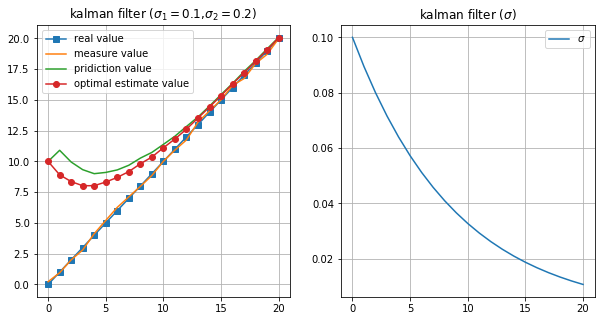

In [9]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].plot(t,t,label="real value",marker='s')
ax[0].plot(t,z_t,label="measure value")
ax[0].plot(t,x_t,label="pridiction value")
ax[0].plot(t,mu_t,label="optimal estimate value",marker='o')
ax[0].legend(loc=2)
ax[0].grid(True)
ax[0].set_title('kalman filter ($\sigma_1=$'+str(sigma_0)+',$\sigma_2=$'+str(sigma_2)+')')

ax[1].plot(t,sigma_t,label="$\sigma$")
ax[1].legend(loc=1)
ax[1].grid(True)
ax[1].set_title('kalman filter ($\sigma$)')

plt.show()